<a href="https://colab.research.google.com/github/danamdz/Laboratorio_A01658253/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
dataframe = pd.read_csv(r"avocado.csv")
dataframe.head()



,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
dataframe.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
print(dataframe.groupby('AveragePrice').size())

AveragePrice
0.44    1
0.46    1
0.48    1
0.49    2
0.51    5
       ..
3.04    1
3.05    1
3.12    1
3.17    1
3.25    1
Length: 259, dtype: int64


<ipython-input-8-06fb3eea708a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['Total Volume'],1).hist()


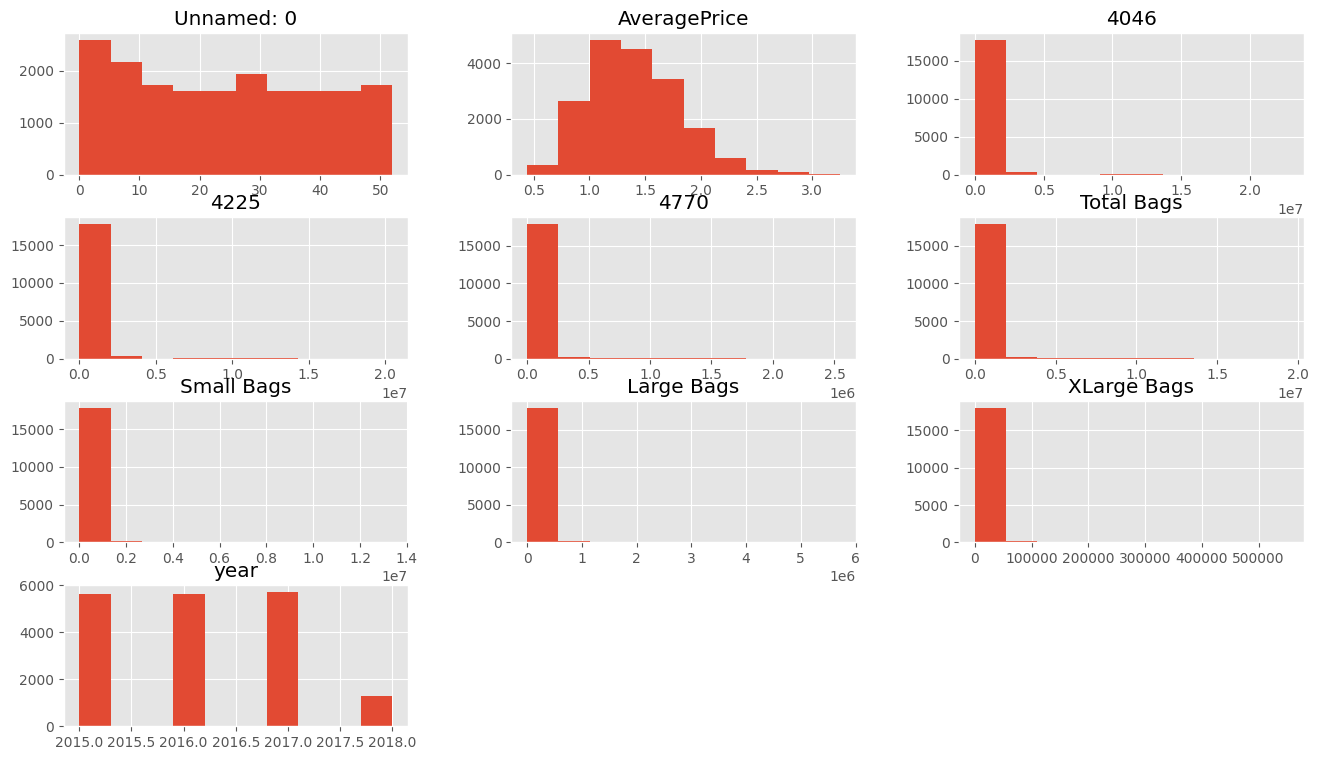

In [ ]:
dataframe.drop(['Total Volume'],1).hist()
plt.show()

<ipython-input-10-06147a10517e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['Total Volume'],1).hist()


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': '4046'}>],
       [<Axes: title={'center': '4225'}>,
        <Axes: title={'center': '4770'}>,
        <Axes: title={'center': 'Total Bags'}>],
       [<Axes: title={'center': 'Small Bags'}>,
        <Axes: title={'center': 'Large Bags'}>,
        <Axes: title={'center': 'XLarge Bags'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >, <Axes: >]],
      dtype=object)

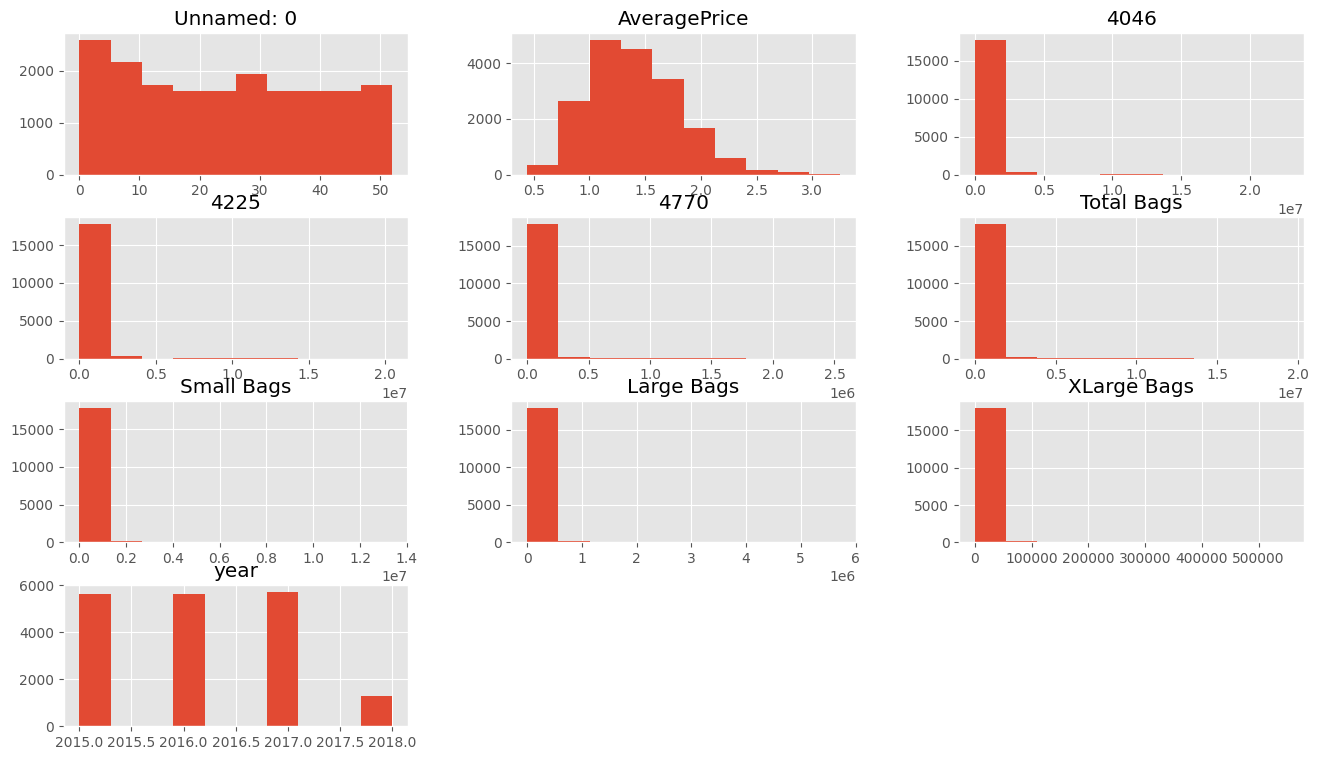

In [ ]:
dataframe.drop(['Total Volume'],1).hist()


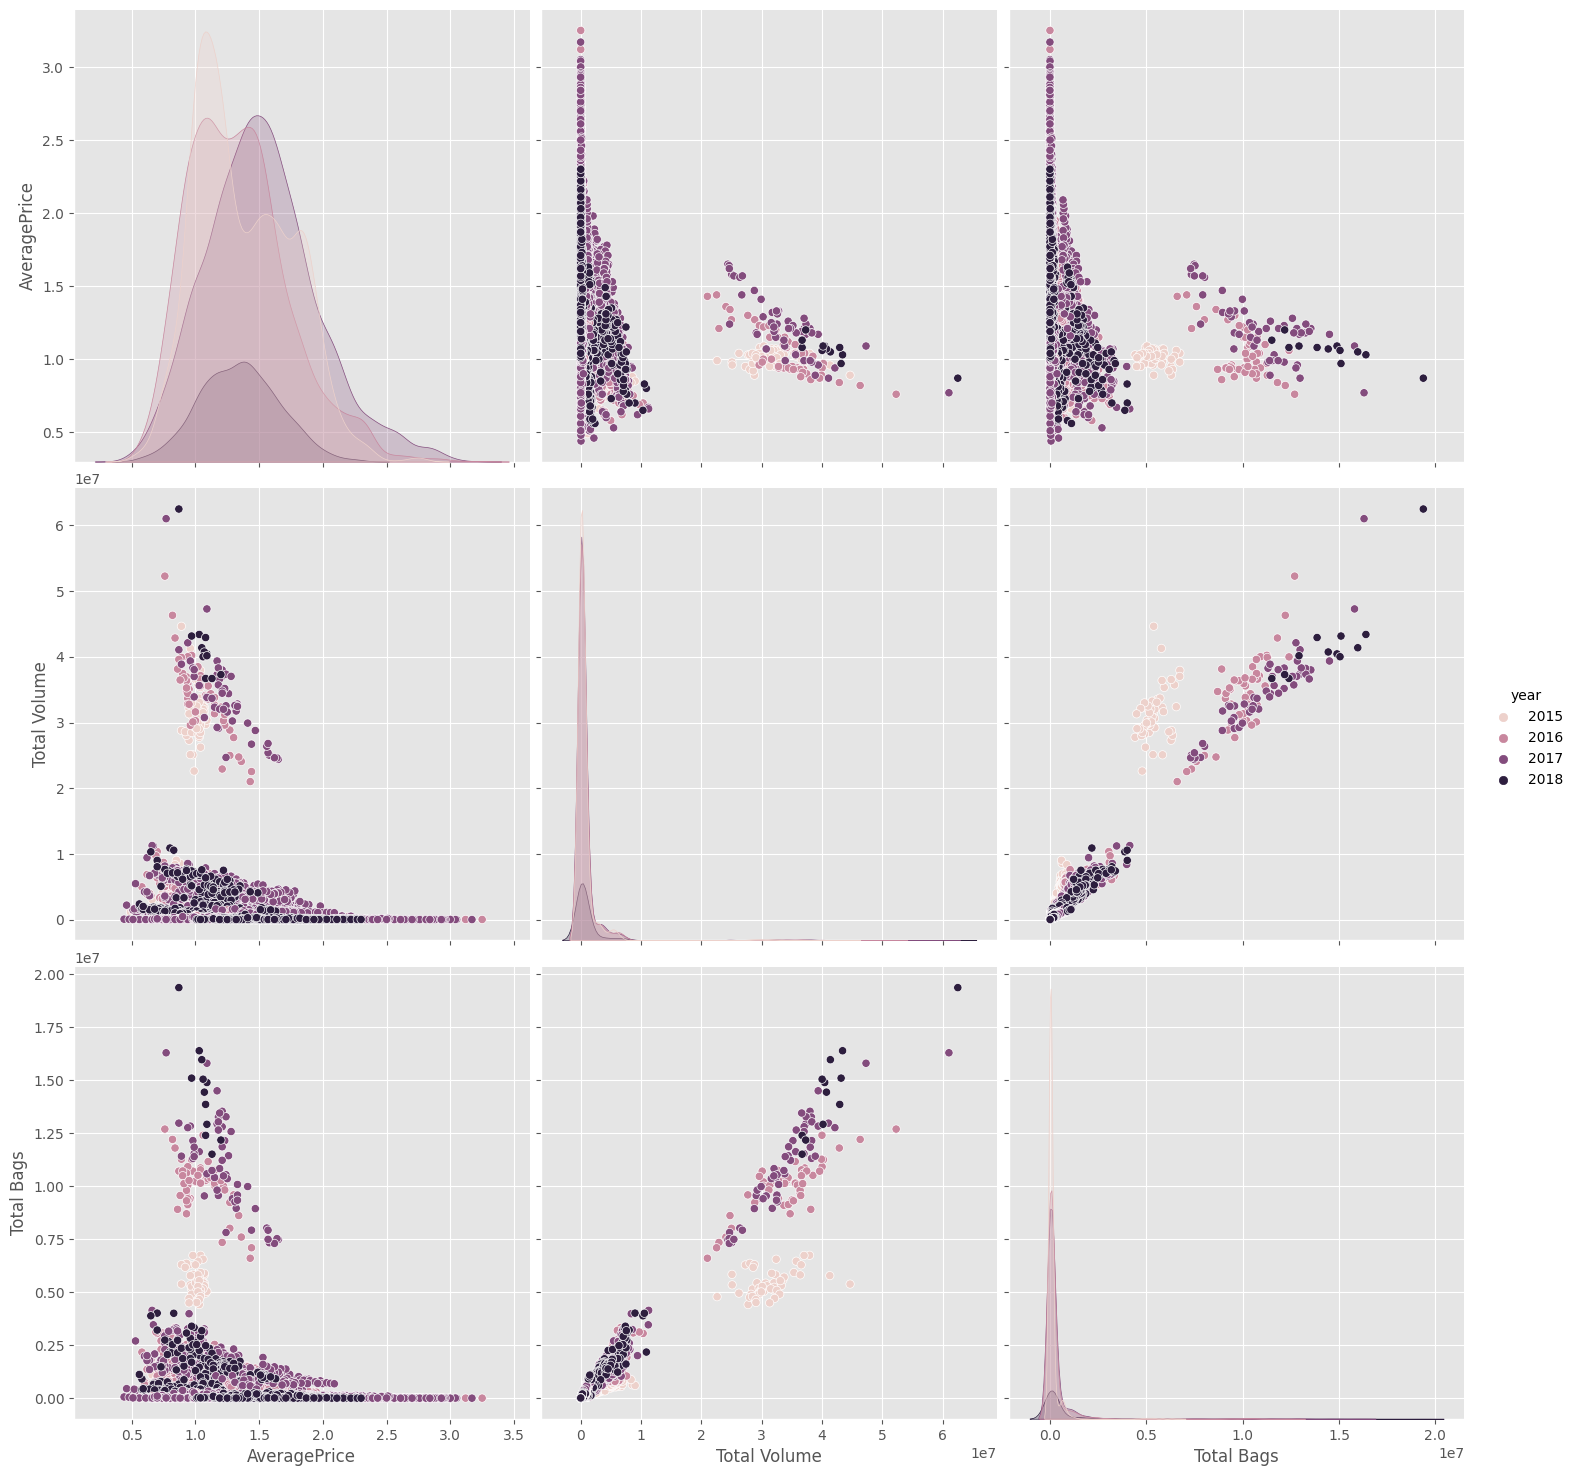

In [ ]:
sb.pairplot(dataframe.dropna(), hue='year',height=5,vars=["AveragePrice","Total Volume","Total Bags"],kind='scatter')

In [ ]:
X = np.array(dataframe[["AveragePrice","Total Volume","Total Bags"]])
y = np.array(dataframe['year'])
X.shape
y


array([2015, 2015, 2015, ..., 2018, 2018, 2018])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

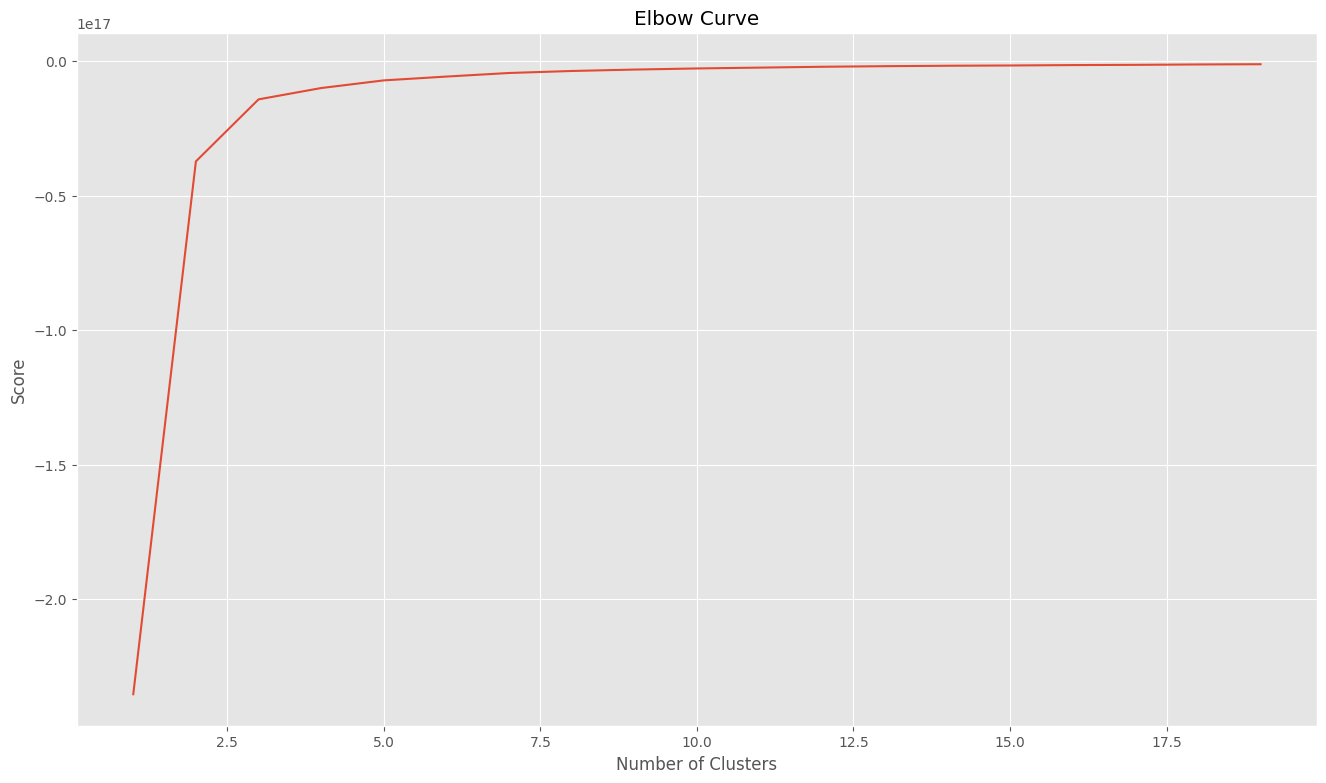

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.40891316e+00 5.43262224e+05 1.55972485e+05]
 [1.09201183e+00 3.37350390e+07 9.19049275e+06]]


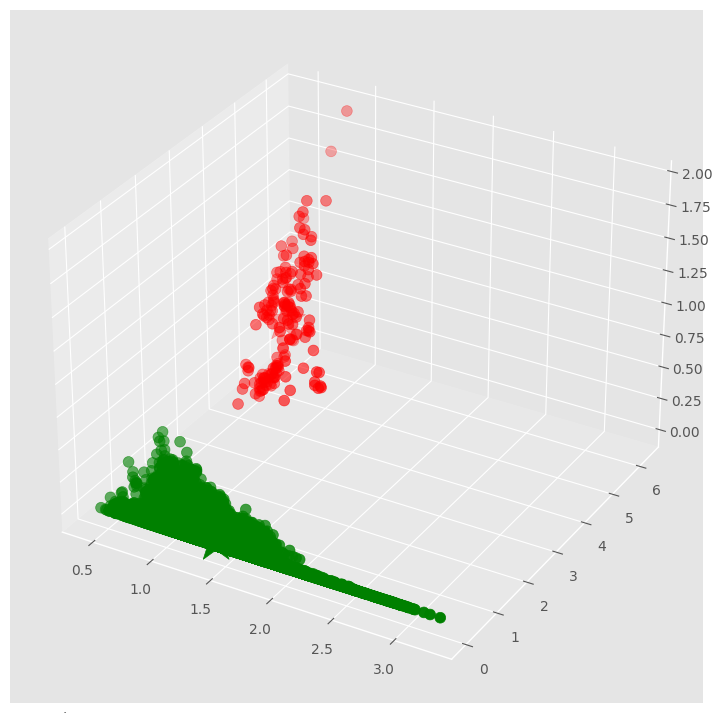

In [ ]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['green','red']
asignar=[]
for row in labels:
  asignar.append(colores[row])
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

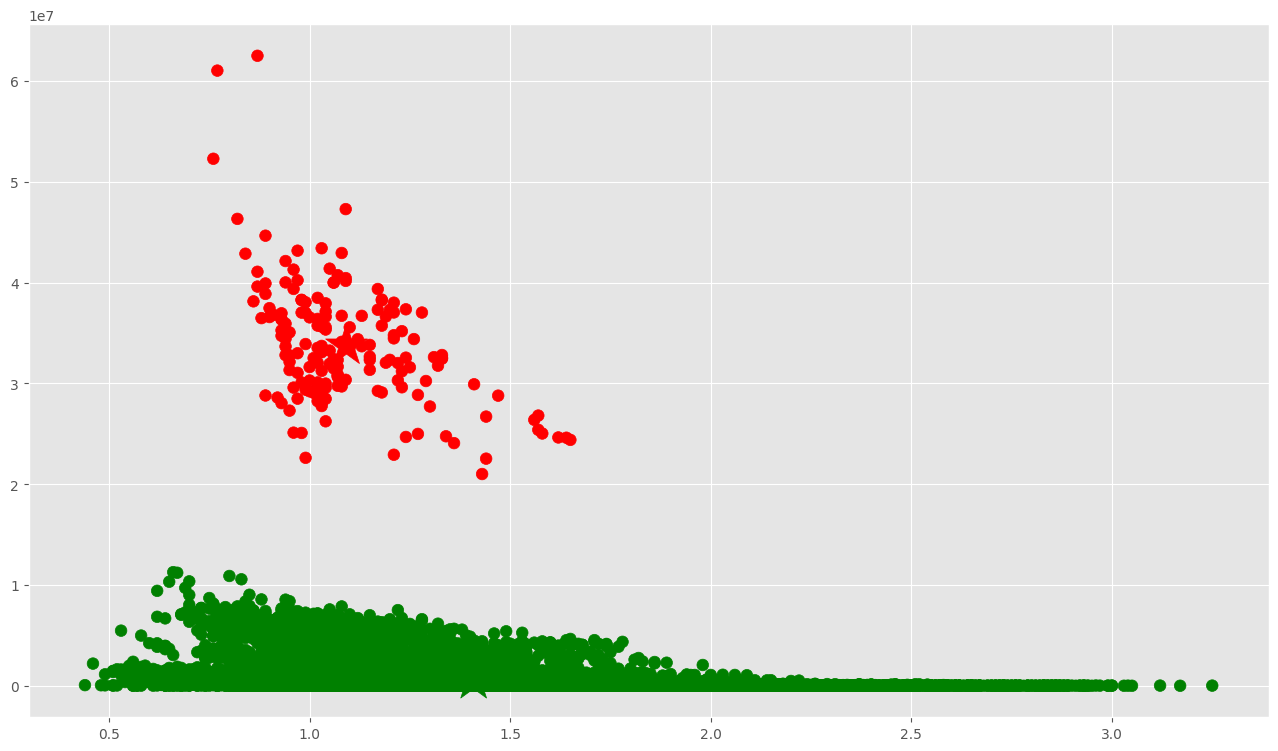

In [ ]:
# Getting the values and plotting it
f1 = dataframe['AveragePrice'].values
f2 = dataframe['Total Volume'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

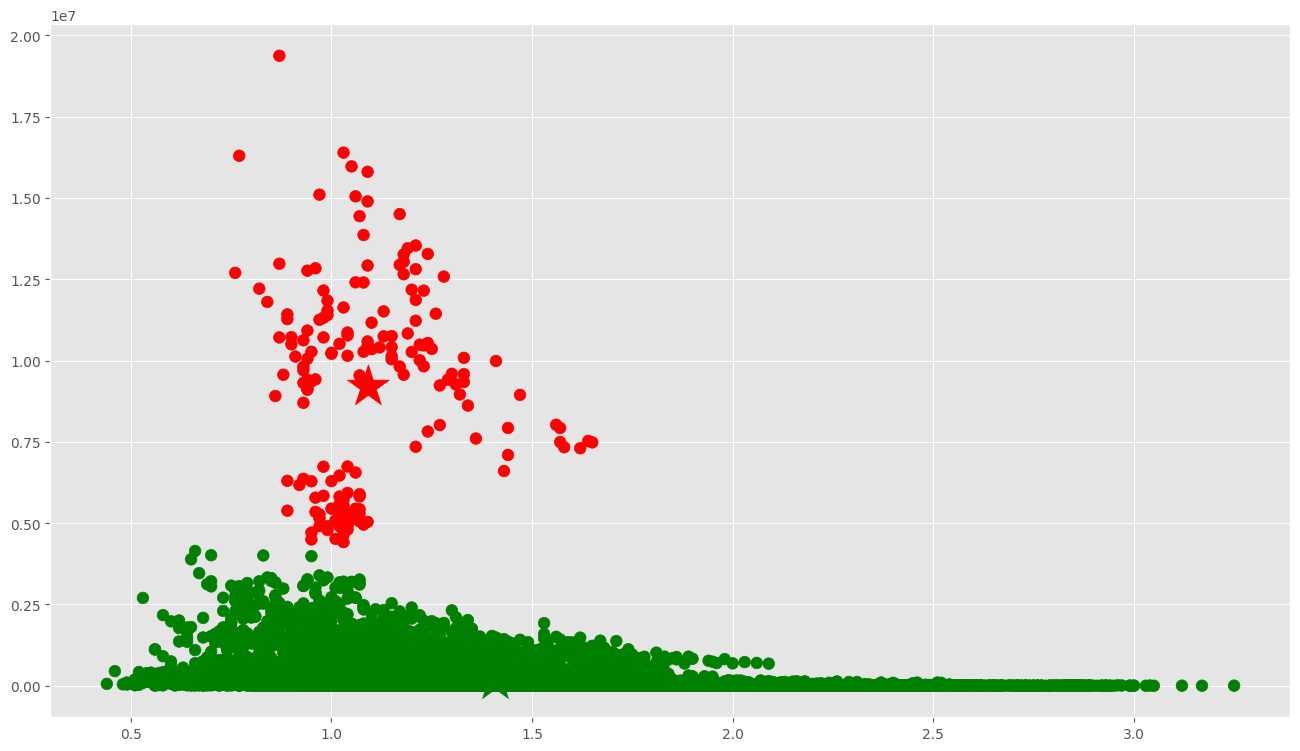

In [ ]:
# Getting the values and plotting it
f1 = dataframe['AveragePrice'].values
f2 = dataframe['Total Bags'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

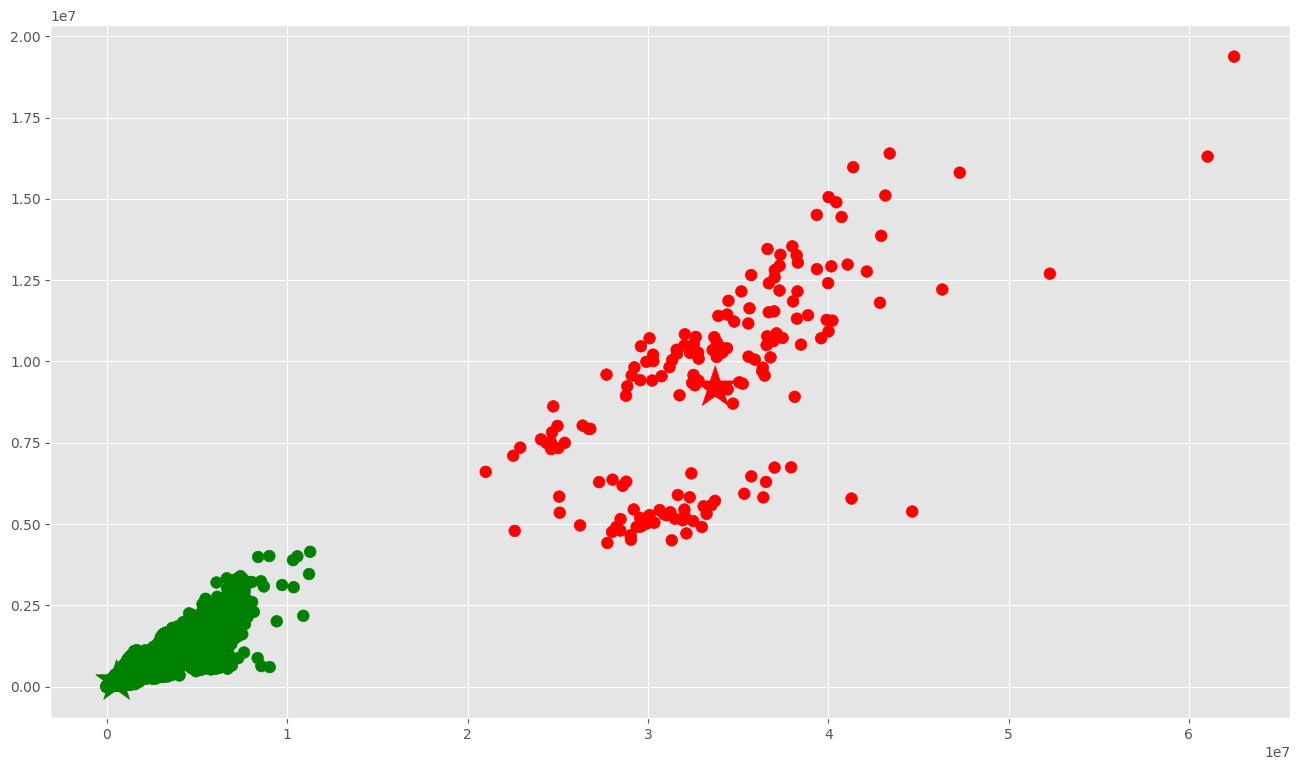

In [ ]:
f1 = dataframe['Total Volume'].values
f2 = dataframe['Total Bags'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()


In [ ]:
#Podemos ver cada uno de los clusters cuantos typos de aguacate tiene:
copy = pd.DataFrame()
copy['type']=dataframe['type'].values
copy['year']=dataframe['year'].values
copy['label'] = labels;
cantidadGrupo = pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo


,color,cantidad
0,green,18080
1,red,169


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.43735465e+00 2.16283874e+05 6.53710350e+04]
 [1.02294118e+00 3.92385145e+07 1.17887706e+07]
 [1.17377687e+00 2.96948758e+06 8.63649291e+05]
 [9.76481149e-01 6.00064391e+06 1.60604672e+06]
 [1.13851485e+00 3.00297287e+07 7.44115717e+06]]


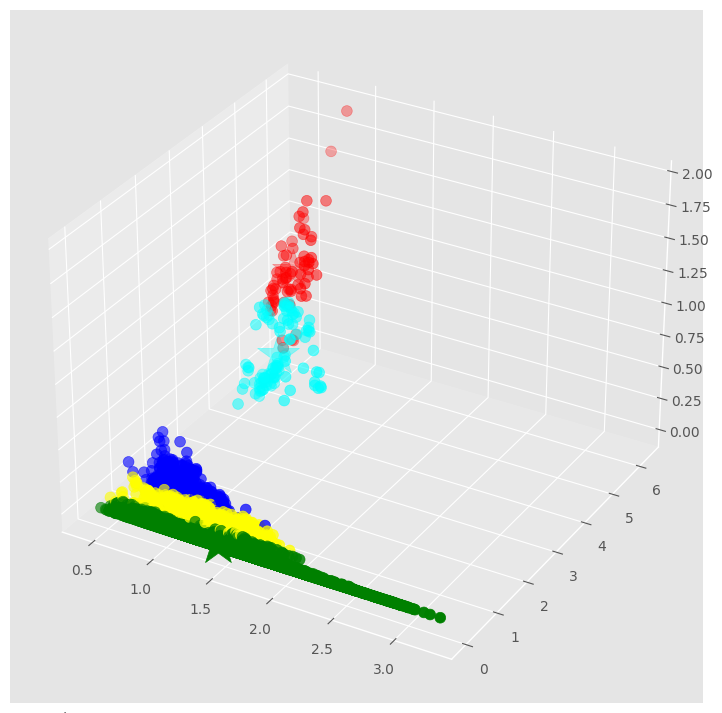

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['green','red','yellow','blue','cyan']
asignar=[]
for row in labels:
  asignar.append(colores[row])
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

##PREGUNTAS


Dana Mendoza Palacios Roji (A0165823)

Los centros marcados en el análisis de clustering representan puntos clave en la agrupación de datos. Esto se debe a que cada estrella marca el centro de un grupo de datos, lo que proporciona una representación significativa de cada grupo. En cuanto al valor de K utilizado, se determinó observando la curva de codo, donde la curva deja de cambiar significativamente, y en este caso, se encontró alrededor del número 2.

Si se utilizara un valor de K más alto, los centros serían menos representativos y podrían generar una mayor dispersión de datos. Por otro lado, si se usara un valor de K más bajo, los centros representarían grupos más grandes y menos diferenciados.

Los centros están bastante separados entre sí, lo que indica una buena diferenciación entre los grupos. Esto facilita la identificación de las características únicas de cada grupo y su análisis.

Si tuviéramos muchos outliers en el análisis de cajas y bigotes, los centros podrían verse afectados y desviarse del valor real. Los outliers, al ser valores extremos, pueden distorsionar la ubicación de los centros.

En base a los centros, podemos observar que los datos están dispersos y que los centros varían entre los diferentes clusters. Además, dependiendo del año, puede haber una mayor cantidad de "Total Bags" en relación con el "Average Price" o una tendencia variable entre "Total Bags" y el "Total Volume". Esto sugiere que la agrupación revela patrones interesantes en los datos, lo que puede ser valioso para el análisis y la toma de decisiones.

Santiago Calderón Ortega A01663888

Para calcular el valor de k, en primer lugar, representamos gráficamente los datos para evaluar su nivel de dispersión. Luego, deseábamos elegir 3 dimensiones específicas: el AveragePrice, el Total Volume y el Total bags. Al examinar los cruces en los gráficos, notamos que los datos se encuentran altamente concentrados en los diagramas, lo que sugiere que podríamos analizarlos de esta manera. Para determinar el número óptimo de clústeres a representar, construimos una curva de codo (elbow curve). Sin embargo, esta curva no mostró una transición suave, sino más bien una inclinación recta.

Decidimos asignar un valor de 2 a k. Antes de esta decisión, habíamos experimentado con un valor de 5, pero observamos que los centros de los clústeres generados en los gráficos estaban muy cercanos entre sí. Tres de ellos estaban agrupados estrechamente, mientras que los otros dos también lo estaban. Esto sugiere que los resultados obtenidos con 2 clústeres son igualmente representativos, ya que los datos siguen manteniendo la misma agrupación que si hubiéramos utilizado 5 clústeres. Además, los valores se aproximan considerablemente a los centros de los clústeres.

Por lo tanto, optamos por utilizar solo 2 centros para agrupar todos los datos. Además, al considerar posibles valores atípicos (outliers) en el análisis de cajas y bigotes, concluimos que esto podría hacer que los datos fueran menos representativos. Al analizar las gráficas de dos dimensiones para comparar los valores entre los datos, observamos que estos están bien agrupados.


Manuel Antonio Morales González A01664652

En las tablas iniciales de color rojo, se presentan los valores de la base de datos. Se generan un total de 10 tablas, una para cada conjunto de datos que se va a graficar con diferentes valores de K (número de clusters). En las tablas de color morado, azul y rosa, se realiza una matriz comparativa que relaciona las variables "average price," "total volume," y "total bags." Los colores representan los diferentes años a los que pertenecen los valores en la matriz.

Es importante destacar que existe una relación lineal entre "total volume" y "total bags," ya que las bolsas contienen el volumen vendido. Además, se observa que a medida que el "average price" disminuye, las ventas aumentan.

La gráfica de la "elbow curve" se utiliza para determinar el valor óptimo de "n_clusters" (número de clusters) en el análisis de clustering. En esta gráfica, se nota que alrededor de K=2, la curva deja de variar significativamente, lo que sugiere que este valor es adecuado para representar los datos.

Posteriormente, se presenta una gráfica tridimensional (3D) con 2 clusters o grupos de datos, representados en rojo y verde. Esta gráfica utiliza las mismas variables de "average price," "total volume," y "total bags," pero ahora se representan en una sola gráfica en lugar de 9 matrices separadas.

En una gráfica 3D posterior, se agregan clusters adicionales con colores diferentes. Sin embargo, al aumentar el número de clusters, no se observan cambios significativos en la representación de los datos.
